# Optimization Beyond Gradient Descent ⌛

Gradient technique can be thought of as a core technique in all forms of machine learning and deep learning, but the hyperparameters involved with the learning process (such as $\eta$, the step size) can be further augmented via other algorithms.

In this lecture we will cover notion of "optimizers" including and not limited to:

- Momentum
- Root Mean Square Propagation (RMSprop)
- Learning Rate Scheduling
- Adaptive Moment Estimation (ADAM)


## Momentum

Consider the following analogy:

Suppose you roll a ball of a steep hill, when the ball eventually reaches the minimum elevation onj the hill, will it immediately stop?

- **No, the momentum the ball gained while rolling down the hill will persist and push the ball a bit upwards beyond the minima, at least a little.**

- **The ball will oscillate around the minimum height point until eventually settling there.**

- **OR the ball will completely move past the local minima and roll over to the reach the next maximum (high point) before rolling back down!**

- The momentum is essentially a function of the movement of the ball as measured in past moments in time.

**In Gradient Descent the weight update at a moment (t) is governed by the learning rate and gradient at that moment only. It doesn’t take into account the past steps taken while traversing the cost space. By using and integrating momentum we alleviate this problem!**

Mathematically, momentum is a way to accelerate the convergence of the model because simply speaking it increases the step size in tow.

- **Momentum requires the notion of velocity which is the rate at which the parameters are updated. Initially velocity is set to 0.**

$$v_{new} = \beta v_{old} + \alpha \delta_{new}$$

- $\beta$ is the momentum coefficent, which is typically ascribed a value from 0 to 1. (0 being no momentum and values closer to 1 give the old momentum more weight). A high momentum may allow the "ball" to push beyond local minima!

- $\alpha$ is the learning rate.

- $\delta_{new}$ is the gradient of the current weights.


This velocity term essentially provides us a rate of change that balances out (kind of takes a moving average of past gradients). We can see that by expanding and further simplifying the velocity calculation for any time $n$

$$v_0 = 0$$

$$v_1 = \beta \cdot v_0 + \alpha \cdot \delta_1 = \alpha \cdot \delta_1$$

$$v_2 = \beta \cdot v_1 + \alpha \cdot \delta_2 = \beta \cdot (\alpha \cdot \delta_1) + \alpha \cdot \delta_2$$

When we continue this trend we realize that for any n:

$$v(n) = \alpha \sum_{t = 1}^n \beta^{n - t} \delta_t$$

We then use this velocity to counteract the current weights:

$$W -= v$$

Or in pure computer science terms with no subscripts: 

```python

v = beta * v + learning_rate * gradient
weights -= v

```

This replaces the standard gradient descent rule:

```python
w = w - learning_rate * gradient
```

---

#### Disclaimer

Some people like to slightly alter the update rule by flipping some signs (but ultimately it works out the same way)

So instead of:

```python

v = beta * v + learning_rate * gradient
weights -= v

```

they would do:

```python

v = beta * v - learning_rate * gradient
weights += v

```

Note that the subtraction in the velocity update state now tracks the velocity required to move in the direction opposite to the gradient (so this velocity is that which counteracts the gradient, and therefore it must be added to the weights).

Whereas in my earlier example the velocity tracked the momentum in the direction of the gradient, therefore we needed to subtract that from the weights after calculating it.

---

### Why use momentum?

Source: https://www.scaler.com/topics/momentum-based-gradient-descent/

Consider the following problems

1) When the learning rate is too high, oscillations can occur where the weights bounce from one side to another of the minima. In other words, the GD algorithm overshoots and results in longer or no convergence.

2) When the learning rate is too low, gradient descent algorithm can take a very long time to find the actual global minimum.

3) For stochastic gradient descent the gradient is evaluated at each data point (random sample) which results in an erratic update process for the cost function.

Momentum helps to,

- Escape local minima and saddle points
- Aids in faster convergence by reducing oscillations
- Smooths out weight updates for stability
- Reduces model complexity and prevents overfitting
- Can be used in combination with other optimization algorithms for improved performance.
- Momentum helps escape saddle points, which are regions where the gradient is close to zero but do not represent a local minimum (a common issue in high-dimensional optimization).

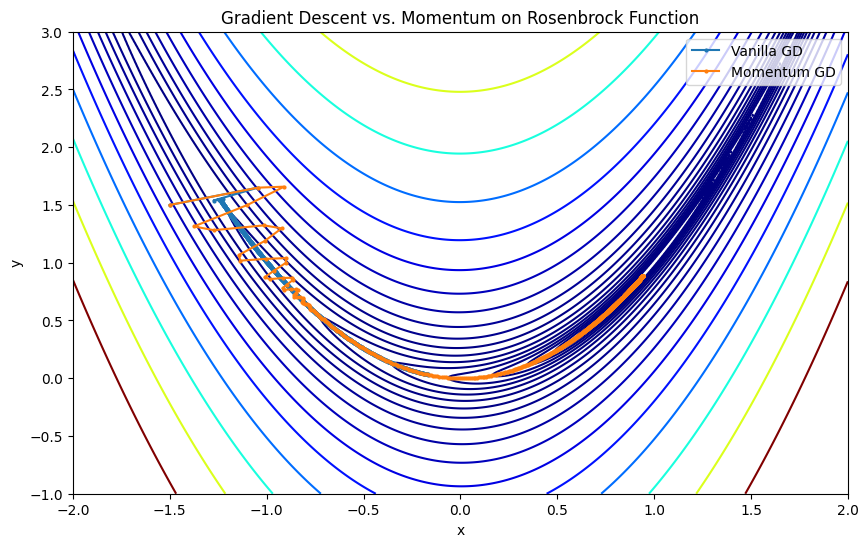

In [6]:
import numpy as np
import matplotlib.pyplot as plt


'''

The Rosenbrock function is defined as: f(x, y) = (1 - x)^2 + 100(y - x^2)^2

The global minimum of this function occurs at (1, 1)

The function looks like a peculiarly curved 2d plane (i.e. x, y, z = f(x, y))
and is great for testing out gradient descent algorithms because there is a nice broad
valley that exists.

Although I could choose to display the plane in 3D, I instead asked GPT to plot its contour
graph and then I used the contour graph to superimpose the progress of the two parameters
as gradient descent proceeded.

'''

# Rosenbrock function and its gradient
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def rosenbrock_grad(x, y):
    dfdx = -2 * (1 - x) - 400 * x * (y - x**2)
    dfdy = 200 * (y - x**2)
    return np.array([dfdx, dfdy])

# Gradient Descent optimizer
class GradientDescent:
    def __init__(self, lr=0.001, momentum=0.0):
        self.lr = lr
        self.momentum = momentum
        self.velocity = np.array([0.0, 0.0])

    def step(self, grad):
        self.velocity = self.momentum * self.velocity - self.lr * grad
        return self.velocity

# Optimization parameters
lr = 0.001
momentum = 0.9
steps = 1000
x_init, y_init = -1.5, 1.5

# Run optimization for both methods
optimizers = {
    "Vanilla GD": GradientDescent(lr=0.001, momentum=0.0),
    "Momentum GD": GradientDescent(lr=0.001, momentum=0.8)  # Lower learning rate for momentum
}

trajectories = {key: [(x_init, y_init)] for key in optimizers}

for key, opt in optimizers.items():
    x, y = x_init, y_init
    for _ in range(steps):
        grad = rosenbrock_grad(x, y)
        update = opt.step(grad)
        x, y = x + update[0], y + update[1]
        trajectories[key].append((x, y))

# Plot results
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock(X, Y)

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='jet')

for key, trajectory in trajectories.items():
    traj = np.array(trajectory)
    plt.plot(traj[:, 0], traj[:, 1], marker='o', markersize=2, label=key)

plt.title("Gradient Descent vs. Momentum on Rosenbrock Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Note that in the same number of iterations, the momentum based algorithm can actually find the global
minimum at (1, 1) despite its initially tumultous behavior. In contrast the vanilla GD algorithm moves very
slowly since its alpha does not get augmented by the "momentum velocity" to move quicker.

### Variations on Momentum GD

Some textbooks prefer for the momentum constant to be $1 - \alpha$ where $\alpha$ is the learning rate. Or oppositely we could frame the learning rate as $1 - \beta$ and the momentum constant as $\beta$.

In this special case our **velocity measurement is also called the exponential moving average (EMA)**.

$$v(t) = \beta \cdot v(t - 1) + (1 - \beta) \cdot \delta_t$$

You should ask yourself: 

- **Why would we want to reduce the number of parameters involved in this momentum equation from 2 ($\alpha$ and $\beta$) to 1 ($\beta$)?**

Generally speaking the traditional formulation of momentum based optimization is applied directly to gradient of the weights, so it only makes sense to keep the alpha multiplier when dealing with the gradient of the underlying weights.

- However if the objective of the momentum function was something also the lines of smoothing the "signal" of a function rather than ensuring convergence, then EMA could be be used (*totally not foreshadowing*)

**In general, momentum based optimization used a separate, new, momentum coefficent $\beta$ which is distinct from $\alpha$ (the learning rate)in order to "push" the "ball" and ultimately supplement the rate of convergence.**

- **When all the past gradients have the same sign, the summation term will be big and "boost" the learning rate which will allow the function to take larger, more confident steps towards the minima.**

- **When some of the past gradients are negative the summation term will be less significant and effectively damp the oscillatory behavior of the function around the minima.**

Lets focus on a way we could deal with the weaknesses of momentum based gradient descent:

1) Certain functions could have such a steep gradient that the momentum function may overshoot potential minima due to the overpowering affect of the momentum. For such functions and in general, fine tuning $\beta$ is necessary.

2) When momentum is too high ($\beta$ is too close to 1), instead of smooth convergence, the updates might overshoot the minima significantly.

In general, momentum based gradient descent can overshoot quite a bit with a high momentum factor or an unfavorably steep function! The former of these problems is evident in the code prior (at least in the early iterations).

**Although the concept of momentum based gradient descent can be applied to any batch size (BGD, SGD, mini batch GD), it is most frequently paired with stochastic gradient descent as the momentum term gets the most opportunity and ability to smooth out or accelerate the learning process when applied to each sample! (And stochastic GD tends to be noisy, which allows momentum optimization the ability to generate more apparent improvements)**

## Root Mean Square Propagation (RMS prop)

Momentum gradient descent is useful but as discussed prior, it has its flaws, the largest of which is that if given a peculiarly steep function or high momentum constant or some unfortunate combination of these factors, it has the potential to overshoot minima (one of which may have been the global minima we were trying to capture!).

So how can we go about stabilizing the behavior of these momentum factor?

Recall our discussion of the EMA (exponential moving average) from earlier!

$$v_t = \beta \cdot v(t - 1) + (1 - \beta) \cdot \delta_t$$

- If we assume that $\beta$ must be positive, is there anyway the EMA can become negative?

- Yes, perhaps the gradient could be negative and with the right value of $\beta$ the entire velocity could become negative.

- What could we do to ensure that $v_t$ always evaluates to a positive value?

- - Why we want this property will become apparent soon!

**We could square the gradient!**

$$v_t = \beta \cdot v(t - 1) + (1 - \beta) \cdot (\delta_t)^2$$

Lets try to understand why this intuitively works and what occurs as a result!

Do not forget that $v_t$ is not a singular number. In fact, neither is $(\delta_t)^2$.

- $v_t$ will contain one velocity value for each parameter, allowing this equation to smooth the progress of convergence on a per parameter basis.

- $\delta_t$ contains one gradient value (rate of change) for each parameter.

- **When we square $\delta_t$ we are squaring each of these rates.** 

- Also note that squaring the rate ensures that we are tracking the magnitude of these rates, not their direction. 

- - **This distinction will allow RMS prop to adjust the gradient purely based on magnitude, not on direction!**

$$
\delta_t = \begin{bmatrix} \frac{\partial L}{\partial \theta_1} \\ \frac{\partial L}{\partial \theta_2} \\ \vdots \\ \frac{\partial L}{\partial \theta_n} \end{bmatrix}
$$

$$
\delta_t^2 = \begin{bmatrix} \left( \frac{\partial L}{\partial \theta_1} \right)^2 \\ \left( \frac{\partial L}{\partial \theta_2} \right)^2 \\ \vdots \\ \left( \frac{\partial L}{\partial \theta_n} \right)^2 \end{bmatrix}
$$

Now that we have a better grasp on why and how we square the gradient lets move to the parameter update phase.

In traditional gradient descent we had:

```python

w = w - learning_rate * gradient

```

In momentum based gradient descent the velocity term was wholly subtracted from the weights:

```python

w = w - v

```

---

### Finalizing RMS Prop

Now since RMS prop is a sort of extension of this idea of momentum, we could principally keep the update stage the same. But the power in RMS prop will lie in how we use $v_t$ to adapt and scale the learning rate.

- ***In other words, the parameter update step of RMS prop is unique compared to traditional gradient descent and momentum based gradient descent because it adapts the step size or pace of learning.**

Consider the proposed update step

$$W(t) = W(t - 1) - \frac{\alpha}{\sqrt{v_t}}\delta_t$$

***Before moving on, ask yourself, how does dividing a scalar such as $\alpha$ by the vector denominator actually work out?***

<details>
    <summary>Click here for the answer</summary>

---

- Truth be told, it is somewhat counter intuitive, but the division is applied element wise, just as all the other operations are. So when calculating the updated weights and going weight by weight, $v_t$ would actually be $v_i(t)$ (a scalar) and $\delta_t$ would actually be $\delta_i(t)$ (a scalar) which would make the division operation perfectly permissible.

This is what I mean:

$$W_i(t) = W_i(t - 1) - \frac{\alpha}{\sqrt{v_i(t)}}\delta_i(t)$$

---

</details>

***Do you intuitively know why this update step is fallible?***

<details>
    <summary>Click here for the answer</summary>

--- 

- If the square root of $v$ is sufficiently small, or effectively 0, then we get a division by zero error!

---
</details>

To fix the prior issue we introduce a non-zero hyperparameter called $\epsilon$ and add it to the denominator.

The finalized update equation is:

$$W(t) = W(t - 1) - \frac{\alpha}{\sqrt{v_t + \epsilon}}\delta_t$$

Or parameter wise it can also be written as:

$$W_i(t) = W_i(t - 1) - \frac{\alpha}{\sqrt{v_{t, i}} + \epsilon}\delta_{t, i}$$

Recall that basic gradient descent is:

$$W(t) = W(t - 1) - \alpha \delta_t$$

A byproduct of introducing $\epsilon$ is also very beneficial, can you spot it?

<details>
    <summary> Click here for the answer </summary>

---

By introducing $\epsilon$, we ensure that the denominator never becomes too small, which effectively limits the maximum possible step size.

$$\frac{\alpha}{\sqrt{v_i(t)} + \epsilon}$$

The upper limit of this coefficient is $\frac{\alpha}{\epsilon}$ (which occurs when $v_i$ is zero).

- This mathematical upperbound prevents the update step from becoming too strong or destabilizing!
- - Particularly useful when gradients are very small (e.g., in plateau regions).

---

</details>


- **If momentum based optimization smooths out and normalizes the change to the overall gradient, then RMS prop normalizes the actual learning rate on a per parameter basis instead of targeting the gradient itself.**

- In situations which are covered in more complex machine learning models that involve hundreds if not several orders of magnitude more parameters, RMS prop effectively normalizes gradient magnitudes across these parameters to ensure stable learning. (i.e. in deep neural networks).

Note that some textbooks and sources prefer using $\eta$ in place of $\alpha$. This is just a change in nomenclature, they both represent the learning rate of the algorithm.

The overall RMS prop algorithm is therefore:

$$v_t = \beta \cdot v(t - 1) + (1 - \beta) \cdot (\delta_t)^2$$

$$W(t) = W(t - 1) - \frac{\alpha}{\sqrt{v_t + \epsilon}}\delta_t$$

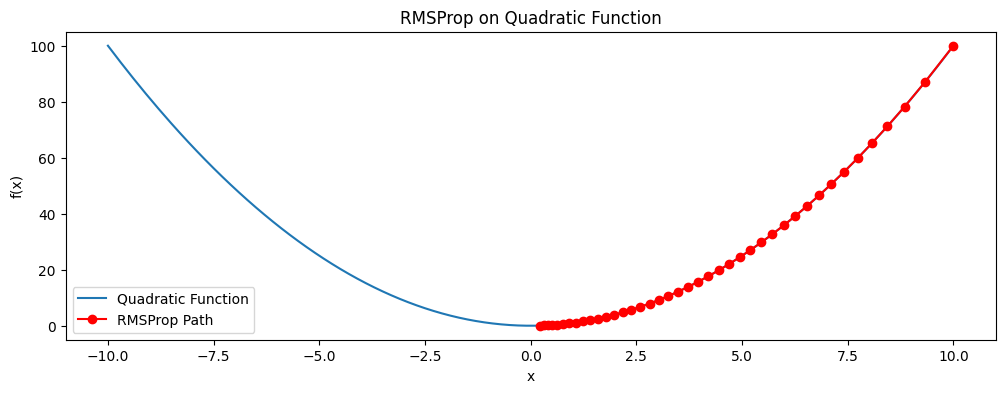

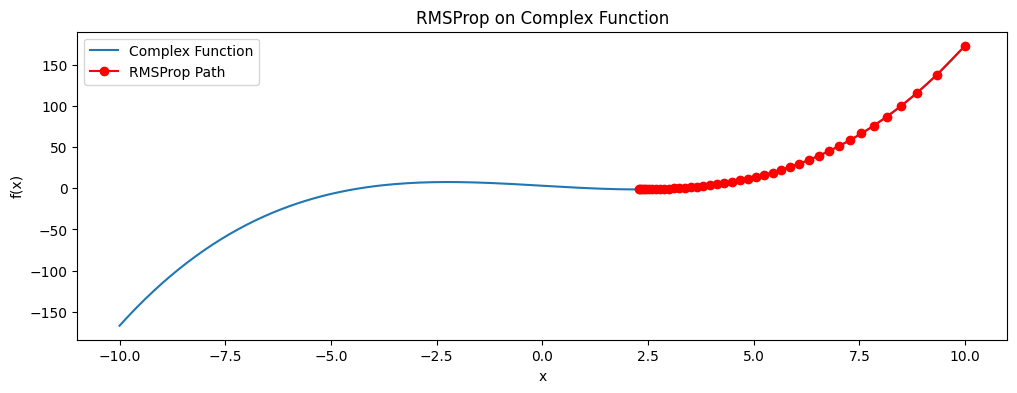

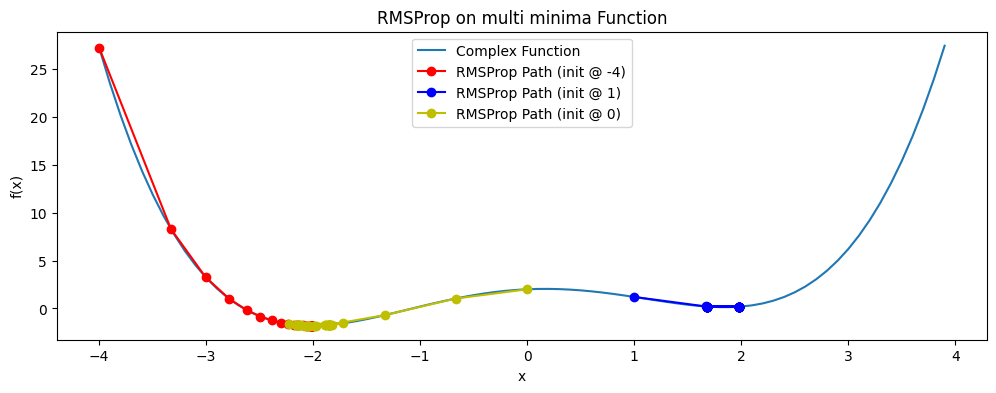

In [21]:
import numpy as np
import matplotlib.pyplot as plt

'''
My code was largely inspired by code on: https://www.geeksforgeeks.org/gradient-descent-with-rmsprop-from-scratch/
Note how the RMS prop function slows down as the functions plateau.
In other words, the RMS prop algorithm becomes more cautious and takes smaller steps when it notices
that the function is leveling off. I hope its apparent how this follows from a momentum based approach
and how it is beneficial in slowing the pace of learning when the gradient's magnitude is minimal and
accelerating learning when the gradient's magnitude increases.

For the final example with multiple minima, not how the starting point affects the local minima that gets found!
'''

def func_quadratic(x):
    return x**2
def grad_quadratic(x):
    return 2*x

def func_complex(x):
    return 0.2 * x**3 - 3 * x + 3.14 # changed coefficients
def grad_complex(x):
    return 0.6 * x**2 - 3 # changed coefficients

def func_multi_minima(x):
    return 0.2 * x**4 - 1.5 * x**2 + 0.5 * x + 2
def grad_multi_minima(x):
    return 0.8 * x**3 - 3 * x + 0.5

x = np.arange(-10, 10, 0.1)

out_quad = func_quadratic(x)
out_complex = func_complex(x)
out_multi_minima = func_multi_minima(np.arange(-4, 4, 0.1))

def simple_rms_prop(x, objective, derivative, lr, beta, epsilon, epochs):
    
    input_path = [x]
    output_path = [objective(x)]
    
    v = 0
    
    for _ in range(epochs):
        grad = derivative(x)
        v = beta * v + (1 - beta) * grad**2
        
        x = x - lr * grad / (np.sqrt(v) + epsilon)
        input_path.append(x)
        output_path.append(objective(x))
        
    return input_path, output_path


if __name__ == "__main__":
    
    input_path, output_path = simple_rms_prop(10, func_quadratic, grad_quadratic, 0.3, 0.8, 0.001, 40)

    # Plotting the objective function
    fig = plt.figure(figsize=(12, 4))
    plt.plot(x, out_quad, label='Quadratic Function')
    plt.plot(input_path, output_path, 'r-o', label='RMSProp Path')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('RMSProp on Quadratic Function')
    plt.legend()
    plt.show()

    input_path2, output_path2 = simple_rms_prop(10, func_complex, grad_complex, 0.3, 0.8, 0.001, 40)
    fig2 = plt.figure(figsize=(12, 4))
    plt.plot(x, out_complex, label='Complex Function')
    plt.plot(input_path2, output_path2, 'r-o', label='RMSProp Path')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('RMSProp on Complex Function')
    plt.legend()
    plt.show()
    
    input_path3, output_path3 = simple_rms_prop(-4, func_multi_minima, grad_multi_minima, 0.3, 0.8, 0.001, 40)
    input_path4, output_path4 = simple_rms_prop(1, func_multi_minima, grad_multi_minima, 0.3, 0.8, 0.001, 40)
    input_path5, output_path5 = simple_rms_prop(0, func_multi_minima, grad_multi_minima, 0.3, 0.8, 0.001, 40)
    fig2 = plt.figure(figsize=(12, 4))
    plt.plot(np.arange(-4, 4, 0.1), out_multi_minima, label='Complex Function')
    plt.plot(input_path3, output_path3, 'r-o', label='RMSProp Path (init @ -4)')
    plt.plot(input_path4, output_path4, 'b-o', label='RMSProp Path (init @ 1)')
    plt.plot(input_path5, output_path5, 'y-o', label='RMSProp Path (init @ 0)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('RMSProp on multi minima Function')
    plt.legend()
    plt.show()
    
    
    

## Adaptive Momentum Estimation

So suppose we wanted to combine the benefits of momentum based gradient descent and RMS prop.

Lets first recap on the functionality of these techniques:

1) Momentum based gradient descent introduced us to the concept smoothing via the hyperparameter $\beta$, it smoothed the actual calculated gradient but it did not augment the step size itself. In doing so, momentum based gradient descent uses the average of past gradients to determine the impact of the current gradient (i.e. if the hill seems to be plateauing, the gradient's current magnitude is minimized otherwise if the hill is descending ever faster, then the gradient's current magnitude is amplified)

2) RMS prop attempts to deal with the momentum based approach's main issue: the tendency to halt around plateaus, by directly modifying the step size in proportion to something called the "second moment" (the uncentered variance) (i.e. $\beta \cdot v_{t - 1} + (1 - \beta) \cdot \delta_t^2 $).

**What is stopping us from augmenting the gradient using momentum based gradient descent and then using the augmented gradient with an augmented step akin to RMS prop?**

- To do this we need two hyperparameters: $\beta_1$ and $\beta_2$

1) For our first step we will use $\beta_1$ to calculate a new augmented gradient that we label $m$ for momentum based of the the prior momentum measurement (the initial value of $m$ will be a zero vector).

$$m_t = \beta_1 \cdot m_{t - 1} + (1 - \beta_1) \cdot \delta_t$$

- **Note that the augmented gradient is mathematically an estimate of the mean gradient that uses the average of priorly used gradients. Once again in statistical or physics contexts this is also called the "first moment".**

2) For our second step we will use $\beta_2$ to make the same calculation we did in RMS prop (with the same reason: it will be used to augment the step size).

$$v_t = \beta_2 \cdot v_{t - 1} + (1 - \beta_2) \cdot \delta_t^2$$

3) Now for the weight update equation we follow the RMS prop equation from earlier but use $m_t$ as the augmented (mean) gradient rather than using the raw "unprocessed" gradient.

$$W_{t + 1} = W_t - \frac{\alpha}{\sqrt{v_t} + \epsilon} \cdot m_t$$


